In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to the two images
img_path1 = r"../image1.jpg"
img_path2 = r"../image2.jpg"

# Load images in COLOR
img1 = cv2.imread(img_path1, cv2.IMREAD_COLOR)
img2 = cv2.imread(img_path2, cv2.IMREAD_COLOR)


In [2]:

# Verify images loaded
if img1 is None or img2 is None:
    raise FileNotFoundError("One of the image paths is incorrect or the file is missing.")

# Optionally resize img2 to match img1 (if needed)
if img1.shape != img2.shape:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Perform arithmetic operations
added      = cv2.add(img1, img2)
subtracted = cv2.subtract(img1, img2)
multiplied = cv2.multiply(img1, img2)
# For division, convert to float32 to avoid truncation:
divided = cv2.divide(img1.astype(np.float32), img2.astype(np.float32))
# Scale back to 0–255 and uint8
divided = cv2.normalize(divided, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Convert BGR→RGB for matplotlib
def to_rgb(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ops = {
    "Original Image 1": img1,
    "Original Image 2": img2,
    "Addition": added,
    "Subtraction": subtracted,
    "Multiplication": multiplied,
    "Division": divided
}


C:\Users\jesli\AppData\Local\Temp\ipykernel_6284\1878050152.py:16: RuntimeWarning: invalid value encountered in cast
  divided = cv2.normalize(divided, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


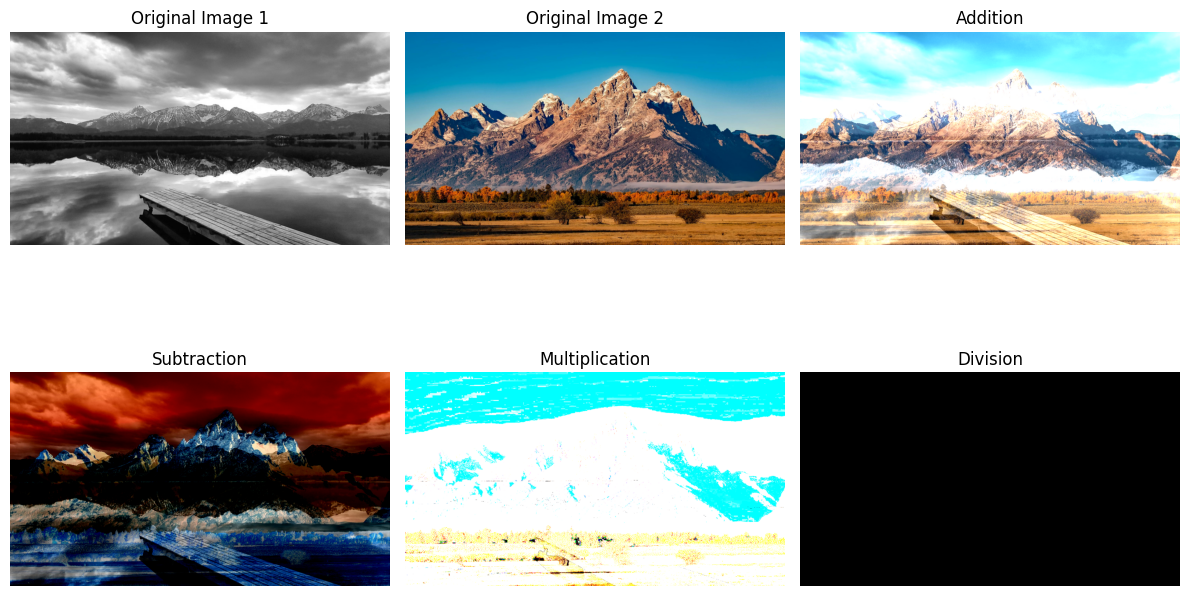

In [3]:

# Display results
plt.figure(figsize=(12, 8))
for i, (title, im) in enumerate(ops.items(), 1):
    plt.subplot(2, 3, i)
    plt.imshow(to_rgb(im))
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()
